In [1]:
import os, sys, subprocess

## CONTRIB
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
#import gseapy as gp
import time 
## LOCAL
import isistools
from ngstools import HSModel, MDA
#from ngstools.Drona import *
%pylab inline
import cPickle as pickle
import inspect
from IPython.display import HTML
import scipy
# import ngstools
# print inspect.getsource(ngstools.Drona)

import plotly.offline as po 
from plotly.graph_objs import *
po.init_notebook_mode(connected=True) 
from plotly.tools import FigureFactory as FF

import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger("requests").setLevel(logging.WARNING)
logging.getLogger("urllib3").setLevel(logging.WARNING)

import contextlib
import sys

@contextlib.contextmanager
def stdout_redirect(where):
    sys.stdout = where
    try:
        yield where
    finally:
        sys.stdout = sys.__stdout__
        
import matplotlib.pyplot as plt
from Bio import SeqIO
from decimal import Decimal
import regex

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


Populating the interactive namespace from numpy and matplotlib


DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


**Summary read lengths statistics. Barcodes not removed.**

In [33]:
#Alternative method of converting fastq to fasta format
!sed -n '1~4s/^@/>/p;2~4p' {directory}/{file} > {directory}/fasta/{new_file}

In [2]:
def FastaStats(fasta,              #full path to fasta file
               data_label,          #To label output
               histogram):          #bool value to generate histogram of read lengths
    ids=0
    cum_reads=0
    read_lens=[]
    count_over300=0
    with open(fasta) as fasta_file:
        for read in SeqIO.parse(fasta_file,'fasta'):
            ids+=1
            cum_reads+=len(read)
            read_lens.append(len(read))
            if len(read)>=300: count_over300+=1
    print 'Fasta stats for '+data_label
    print str(ids)+' reads total'
    print 'Total bases sequenced: '+str(cum_reads)
    print 'Overall read length statistics (in bp):'
    print 'Mean= '+str(cum_reads/ids)
    print 'Median= '+str(median(read_lens))
    print('Min= '+str(min(read_lens)))
    print 'Max= '+str(max(read_lens))
    print('# Reads over 300bp: '+str(count_over300))
    
    if histogram:
        hist=plt.hist(read_lens,bins=60,edgecolor='black')
        plt.title('Read Length Histogram of '+data_label)
        plt.xlabel('Number of bases')
        plt.xlim(min(read_lens),14000)
        plt.show()
        cum_hist=plt.hist(read_lens,bins=60,cumulative=True,histtype='step',facecolor='green')
        plt.title('Cumulative Read Lengths of '+data_label)
        plt.xlabel('Number of bases')
        plt.show()

Fasta stats for a431utc
581661 reads total
Total bases sequenced: 1191217059
Overall read length statistics (in bp):
Mean= 2047
Median= 1889.0
Min= 73
Max= 70596
# Reads over 300bp: 567801


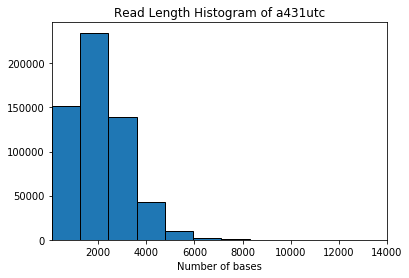

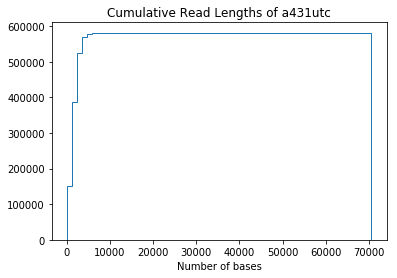

In [6]:
FastaStats('2019-8-6_cdna/a431utc/a431utc.fasta',
          'a431utc',
          True)